In [7]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_context("talk")
os.makedirs(r"C:\Users\HP\OneDrive\Desktop\PROJECT\data\processed", exist_ok=True)


Matplotlib is building the font cache; this may take a moment.


In [9]:
df=pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\PROJECT\data\raw.csv")
print("Loaded dataframe shape:", df.shape)
df.head()
df.info()
display(df.describe(include='all').T)

Loaded dataframe shape: (1259, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Timestamp,1259,1246,2014-08-27 12:43:28,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,1259.0,NaN,NaN,NaN,79428148.311358,2818299442.981968,-1726.0,27.0,31.0,36.0,99999999999.0
Gender,1259,49,Male,615,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,1259,48,United States,751,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,744,45,CA,138,NaN,NaN,NaN,NaN,NaN,NaN,NaN
self_employed,1241,2,No,1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN
family_history,1259,2,No,767,NaN,NaN,NaN,NaN,NaN,NaN,NaN
treatment,1259,2,Yes,637,NaN,NaN,NaN,NaN,NaN,NaN,NaN
work_interfere,995,4,Sometimes,465,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_employees,1259,6,6-25,290,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
missing = df.isnull().sum().sort_values(ascending=False)
missing_pct = (missing / len(df) * 100).round(2)
missing_table = pd.concat([missing, missing_pct], axis=1)
missing_table.columns = ['missing_count', 'missing_pct']
missing_table.head(40)


,missing_count,missing_pct
comments,1095,86.97
state,515,40.91
work_interfere,264,20.97
self_employed,18,1.43
Gender,0,0.00
Timestamp,0,0.00
Age,0,0.00
family_history,0,0.00
treatment,0,0.00
no_employees,0,0.00


In [11]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Categorical cols (sample):", cat_cols[:20])
print("Numeric cols:", num_cols[:20])


Categorical cols (sample): ['Timestamp', 'Gender', 'Country', 'state', 'self_employed', 'family_history', 'treatment', 'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers']
Numeric cols: ['Age']


In [12]:
age_candidates = [c for c in df.columns if 'age' in c.lower()]
age_candidates

['Age']

After cleaning Age: missing = 8 of 1259


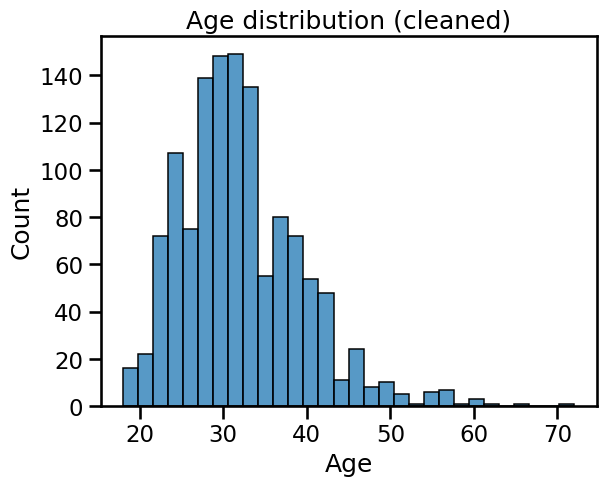

In [13]:
if age_candidates:
    age_col = age_candidates[0]
    df[age_col] = pd.to_numeric(df[age_col], errors='coerce')
    df.loc[(df[age_col] < 14) | (df[age_col] > 100), age_col] = np.nan
    print(f"After cleaning {age_col}: missing = {df[age_col].isnull().sum()} of {len(df)}")
    sns.histplot(df[age_col].dropna(), bins=30)
    plt.title(f"{age_col} distribution (cleaned)")
    plt.show()

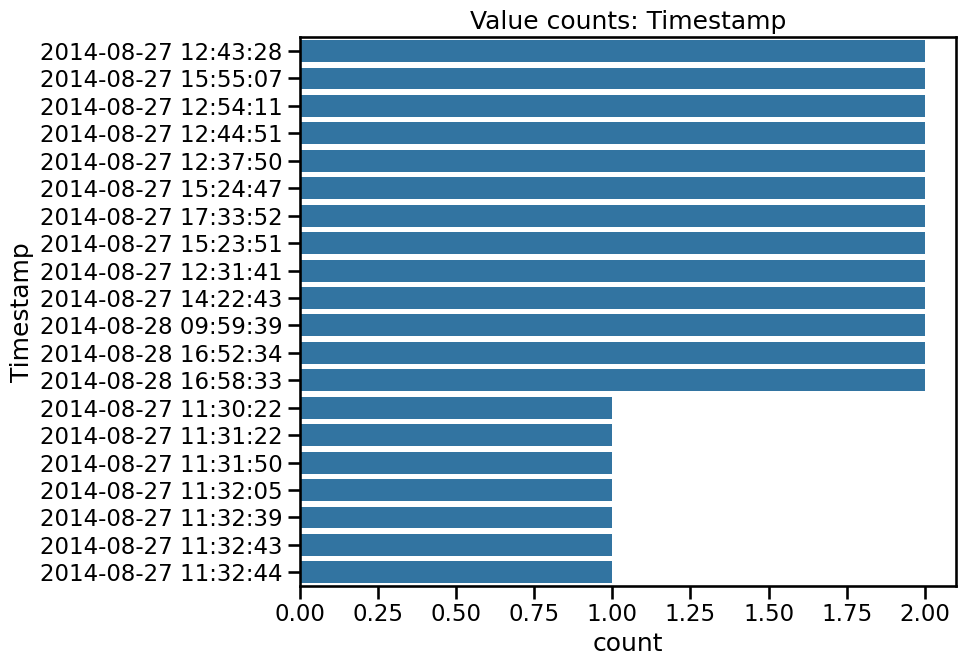

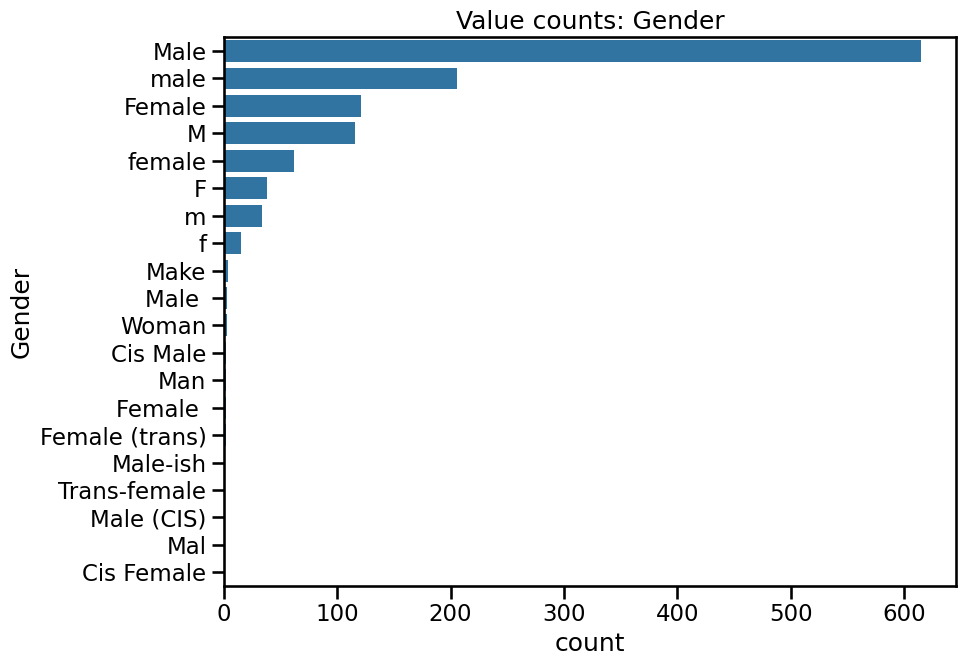

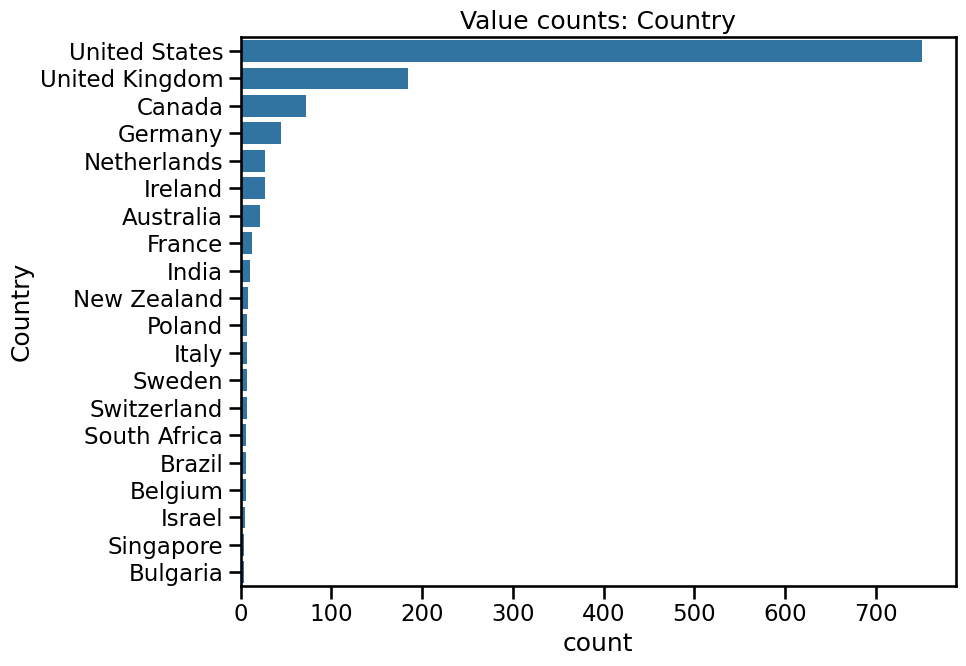

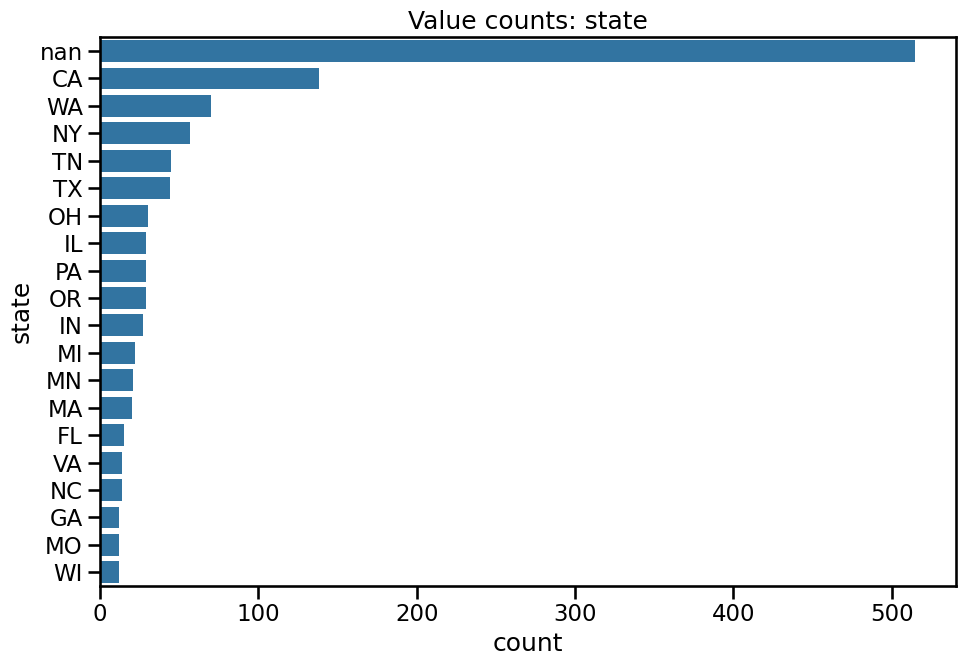

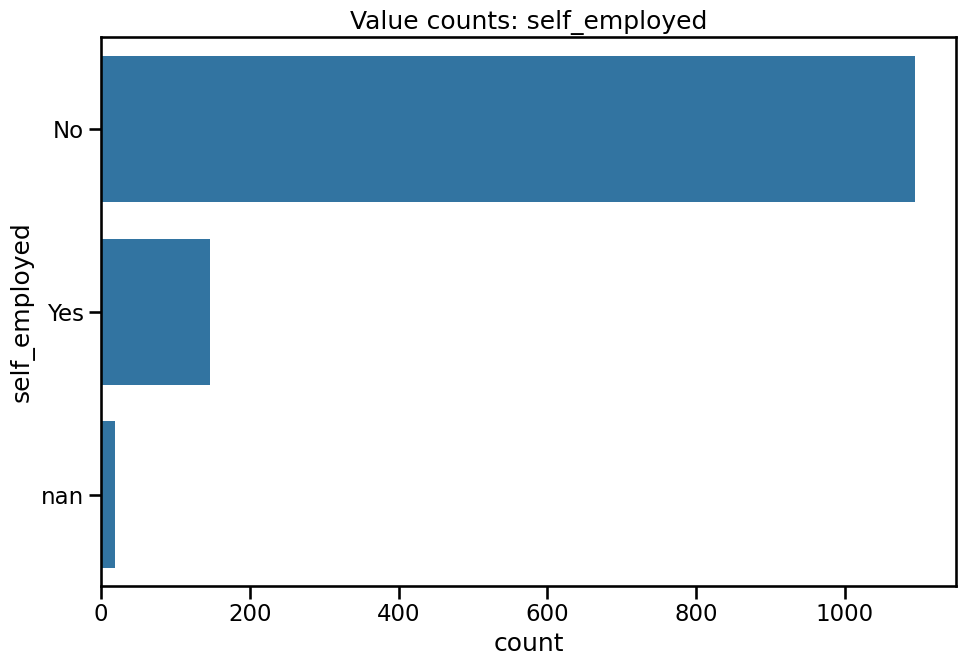

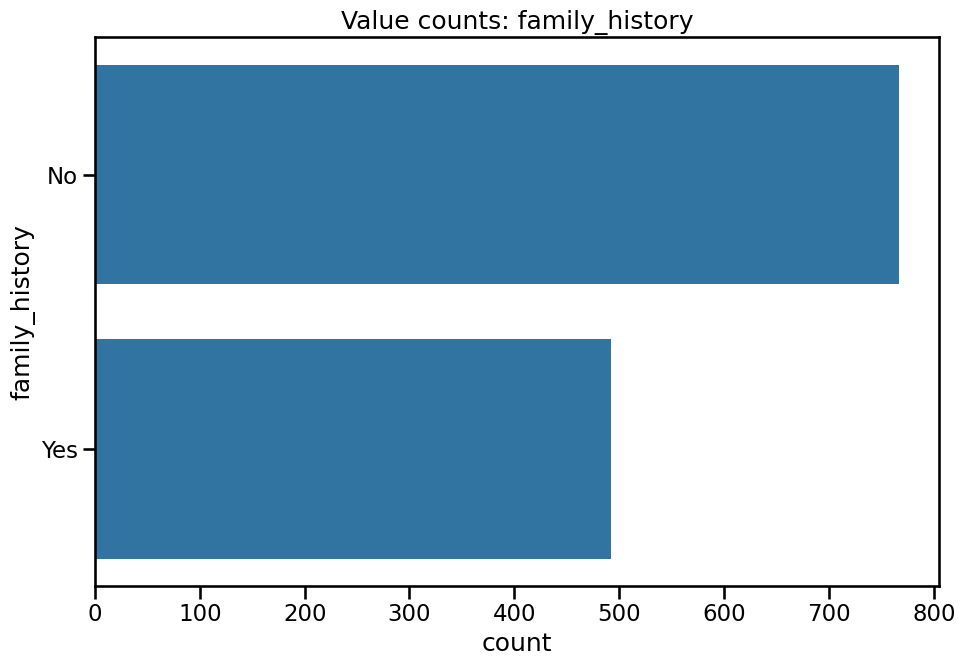

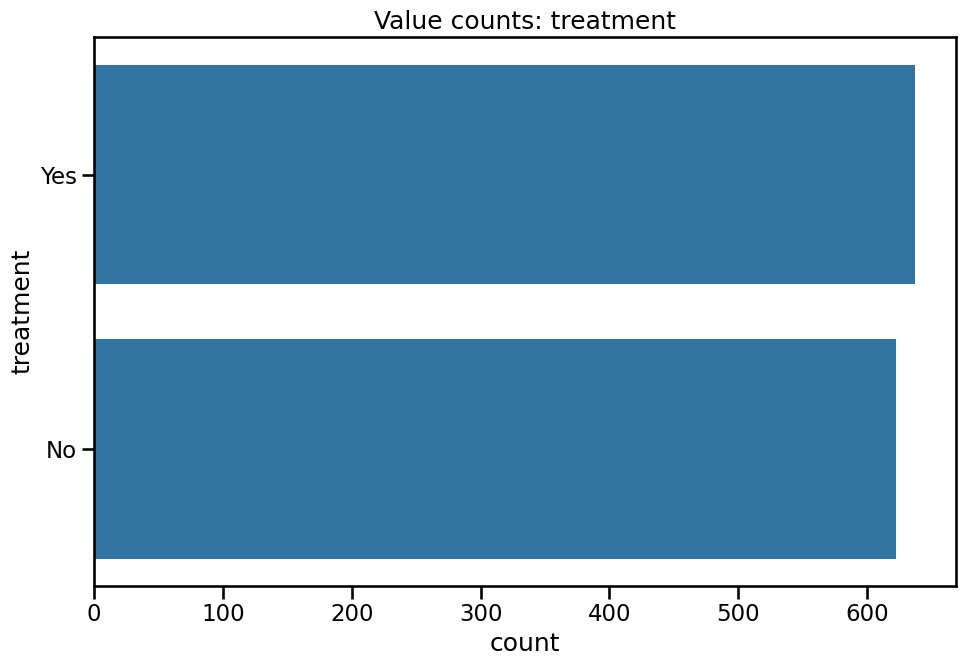

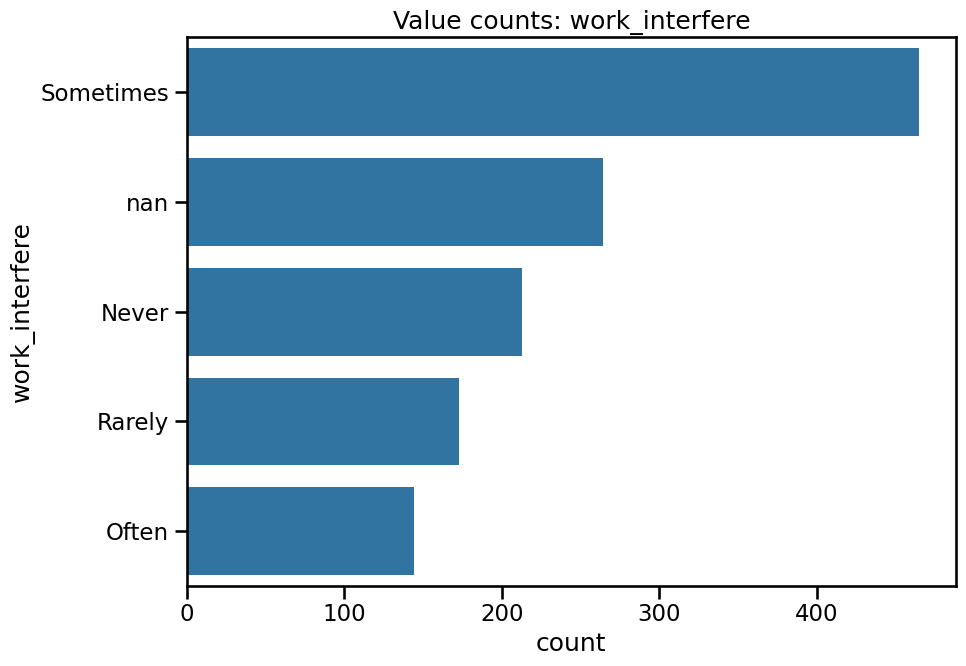

In [17]:
top_cat = cat_cols[:8]  
for c in top_cat:
    plt.figure(figsize=(10,7))
    vc = df[c].value_counts(dropna=False).nlargest(20)
    sns.barplot(y=vc.index.astype(str), x=vc.values)
    plt.title(f"Value counts: {c}")
    plt.xlabel("count")
    plt.tight_layout()
    plt.show()


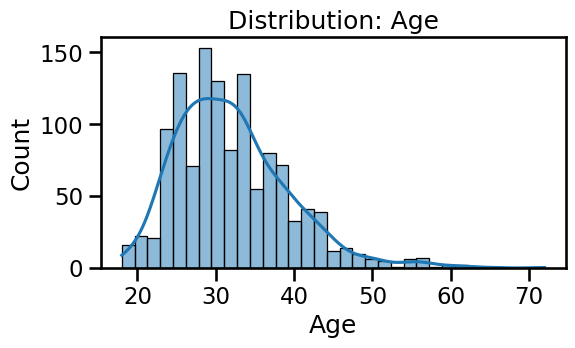

In [18]:
for c in num_cols[:6]:  
    plt.figure(figsize=(6,3))
    sns.histplot(df[c].dropna(), kde=True)
    plt.title(f"Distribution: {c}")
    plt.show()

if len(num_cols) >= 3:
    sample_cols = num_cols[:4]
    sns.pairplot(df[sample_cols].dropna().sample(min(500, len(df))), diag_kind='kde')
    plt.suptitle("Pairwise relationships (sample)", y=1.02)
    plt.show()


In [21]:
candidates = [c for c in df.columns if c.lower() in 
              ['treatment','work_interfere','self_employed','seek_help','diagnosed','mental_health'] ]
candidates, df.columns[:50]
for c in candidates:
    print("Column:", c)
    print(df[c].value_counts(dropna=False).head(20))
    


Column: self_employed
self_employed
No     1095
Yes     146
NaN      18
Name: count, dtype: int64
Column: treatment
treatment
Yes    637
No     622
Name: count, dtype: int64
Column: work_interfere
work_interfere
Sometimes    465
NaN          264
Never        213
Rarely       173
Often        144
Name: count, dtype: int64
Column: seek_help
seek_help
No            646
Don't know    363
Yes           250
Name: count, dtype: int64


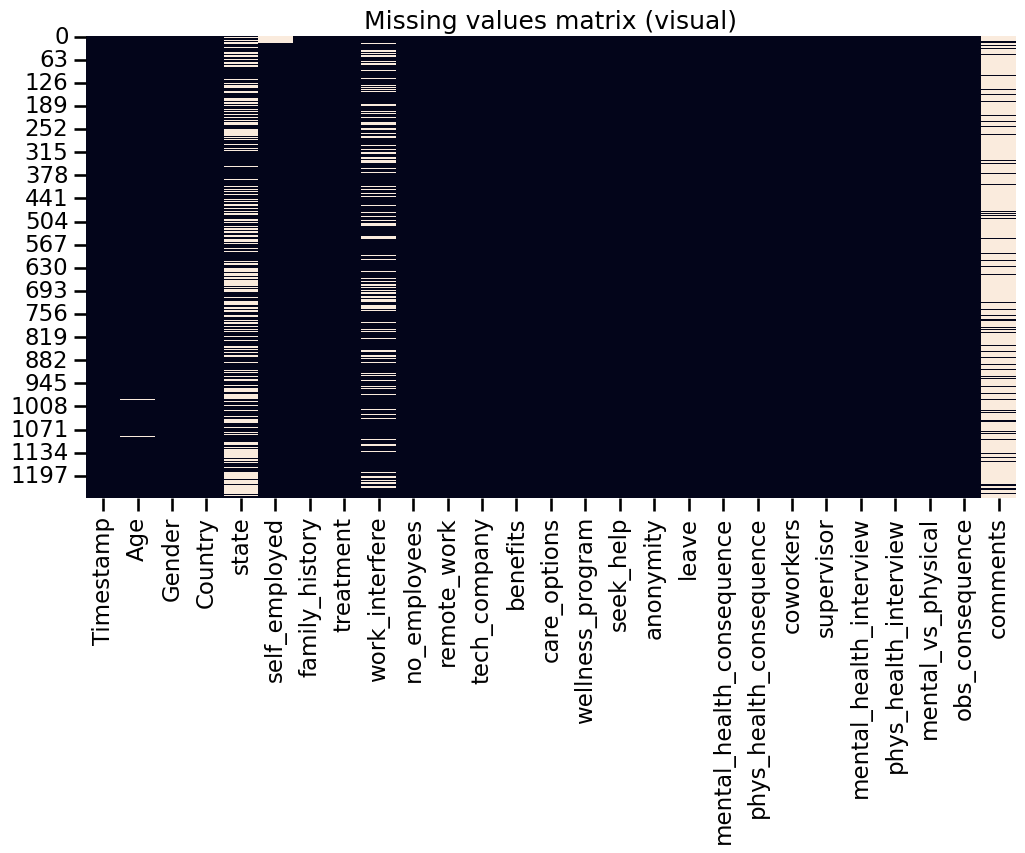

In [22]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing values matrix (visual)")
plt.show()

In [24]:
cols_to_drop = missing_table[missing_table['missing_pct'] > 50].index.tolist()
print("Dropping columns:", cols_to_drop)
df_clean = df.drop(columns=cols_to_drop)

num_cols_clean = df_clean.select_dtypes(include=[np.number]).columns.tolist()
cat_cols_clean = df_clean.select_dtypes(include=['object','category']).columns.tolist()

for c in num_cols_clean:
    if df_clean[c].isnull().sum() > 0:
        df_clean[c] = df_clean[c].fillna(df_clean[c].median())

for c in cat_cols_clean:
    if df_clean[c].isnull().sum() > 0:
        df_clean[c] = df_clean[c].fillna(df_clean[c].mode().iloc[0])


out_path = r"C:\Users\HP\OneDrive\Desktop\PROJECT\data\processed\clean_survey.csv"
df_clean.to_csv(out_path, index=False)
print("Saved cleaned dataset to:", out_path)


Dropping columns: ['comments']
Saved cleaned dataset to: C:\Users\HP\OneDrive\Desktop\PROJECT\data\processed\clean_survey.csv
